In [21]:
#İmport libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
import bar_chart_race as bcr
import seaborn as sns

# **Terrorism Hotspots**

# **A)**Import database

In [53]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

<ipython-input-53-0b573f5ce41e>:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


#**B)** Clean The Database
We will clean the NaN values and useless collums while we will filter the collums we need in this project

In [54]:

df = df.dropna(subset=['latitude', 'longitude'])

df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)+df['suicide'].fillna(0)

df_cleaned = df[['eventid','iyear','imonth','iday', 'country_txt', 'region_txt', 'attacktype1_txt', 'nkill', 'nwound', 'casualties', 'latitude', 'longitude', 'property','success',
'nkillus','suicide',]]
df_cleaned.tail(34)

<ipython-input-54-d5137d448d53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)+df['suicide'].fillna(0)


,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,nkill,nwound,casualties,latitude,longitude,property,success,nkillus,suicide
181657,201712300015,2017,12,30,Kenya,Sub-Saharan Africa,Armed Assault,0.0,0.0,0.0,-1.595245,40.514259,1,1,0.0,0
181658,201712300016,2017,12,30,Kenya,Sub-Saharan Africa,Bombing/Explosion,0.0,0.0,0.0,-1.595245,40.514259,1,1,0.0,0
181659,201712300017,2017,12,30,Kenya,Sub-Saharan Africa,Facility/Infrastructure Attack,0.0,0.0,0.0,-1.595245,40.514259,1,1,0.0,0
181660,201712300018,2017,12,30,Ukraine,Eastern Europe,Hostage Taking (Barricade Incident),0.0,1.0,2.0,49.993500,36.230383,0,1,0.0,1
181661,201712300019,2017,12,28,India,South Asia,Facility/Infrastructure Attack,1.0,0.0,1.0,17.001086,81.807490,1,1,0.0,0
181662,201712300020,2017,12,30,Philippines,Southeast Asia,Bombing/Explosion,NaN,2.0,2.0,7.042777,126.449221,0,1,0.0,0
181663,201712300021,2017,12,30,India,South Asia,Bombing/Explosion,0.0,0.0,0.0,11.831902,75.565432,0,1,0.0,0
181664,201712300022,2017,12,30,United Kingdom,Western Europe,Armed Assault,0.0,2.0,2.0,54.607712,-5.956210,0,1,0.0,0
181665,201712300023,2017,12,30,India,South Asia,Facility/Infrastructure Attack,0.0,0.0,0.0,18.802725,81.497666,1,1,0.0,0
181666,201712300025,2017,12,30,Nigeria,Sub-Saharan Africa,Facility/Infrastructure Attack,NaN,NaN,0.0,11.492144,12.969724,1,1,0.0,0


#Question 1/a)
How has the number of terrorist activities changed over the years?

<Axes: title={'center': 'Number of attacks per year (1970-2017)'}, xlabel='Year', ylabel='Number of attacks'>

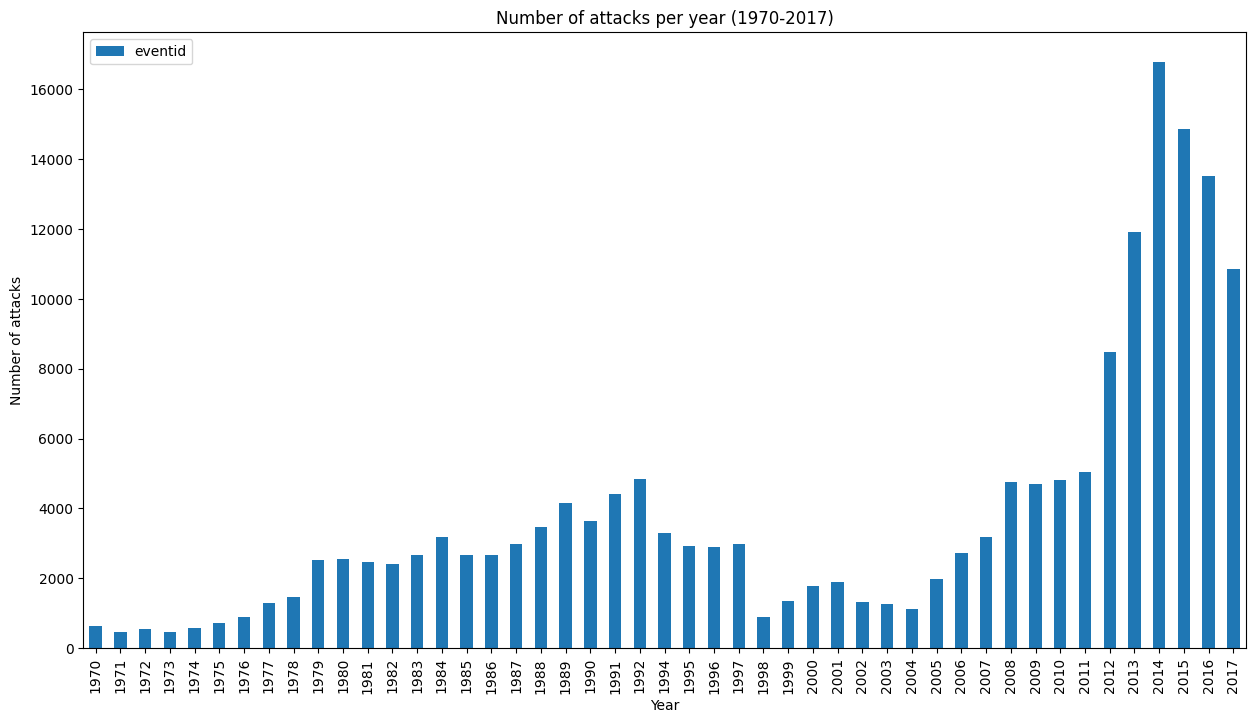

In [55]:
df2 = df.groupby(['iyear'], as_index=True).count()[['eventid']]

df2.plot.bar(xlabel='Year', ylabel='Number of attacks', title='Number of attacks per year (1970-2017)', figsize=(15, 8))


# Question 1/b)
Are there certain regions where this trend is different from the global averages?

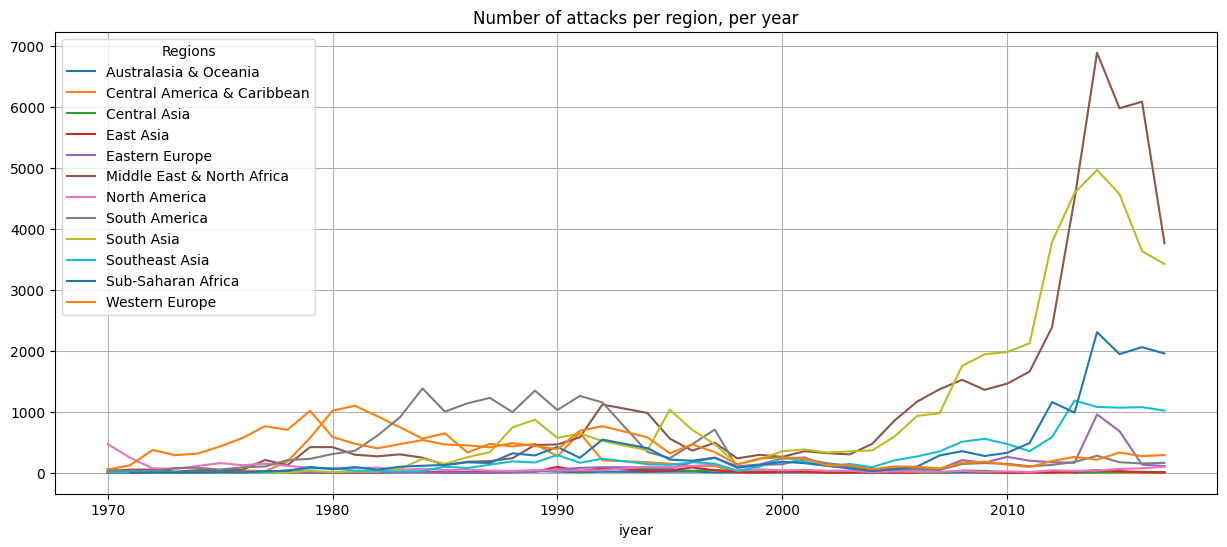

In [12]:
df.region_txt.unique()

df3 = df[['region_txt', 'iyear', 'eventid', 'nkill']].groupby(['region_txt', 'iyear']).agg({'eventid':'count', 'nkill':'sum'})

df3.unstack(level=0)['eventid'].plot(kind='line', figsize=(15, 6), grid=True)
plt.legend(title='Regions')
plt.title('Number of attacks per region, per year')

# show the graph
plt.show()

In [13]:
df4 = pd.DataFrame(index=df.iyear.unique(), columns=df.region_txt.unique())

for col in df4.columns:
    for ind in df4.index:
        try:
            df4.loc[ind][col] = df3.loc[col, ind]['eventid']
        except:
            df4.loc[ind][col]  = 0
df4.head(15)

<ipython-input-13-374f1727821e>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df4.loc[ind][col] = df3.loc[col, ind]['eventid']
<ipython-input-13-374f1727821e>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,South America,Eastern Europe,Middle East & North Africa,Australasia & Oceania,South Asia,Sub-Saharan Africa,Central Asia
1970,6.0,472.0,9.0,49.0,2.0,63.0,12.0,28.0,1.0,1.0,0,0
1971,4.0,247.0,5.0,124.0,1.0,23.0,5.0,52.0,1.0,0,1.0,0
1972,3.0,73.0,16.0,374.0,0,25.0,0,52.0,3.0,1.0,4.0,0
1973,6.0,64.0,1.0,288.0,2.0,78.0,1.0,19.0,1.0,1.0,4.0,0
1974,11.0,111.0,3.0,315.0,4.0,81.0,2.0,42.0,1.0,2.0,5.0,0
1975,9.0,159.0,6.0,432.0,10.0,53.0,0,44.0,0,4.0,10.0,0
1976,42.0,124.0,7.0,572.0,2.0,90.0,0,51.0,0,4.0,8.0,0
1977,23.0,149.0,8.0,764.0,4.0,104.0,2.0,209.0,0,2.0,27.0,0
1978,187.0,115.0,41.0,705.0,35.0,209.0,2.0,126.0,2.0,2.0,31.0,0
1979,571.0,79.0,72.0,1016.0,15.0,228.0,1.0,421.0,2.0,33.0,95.0,0


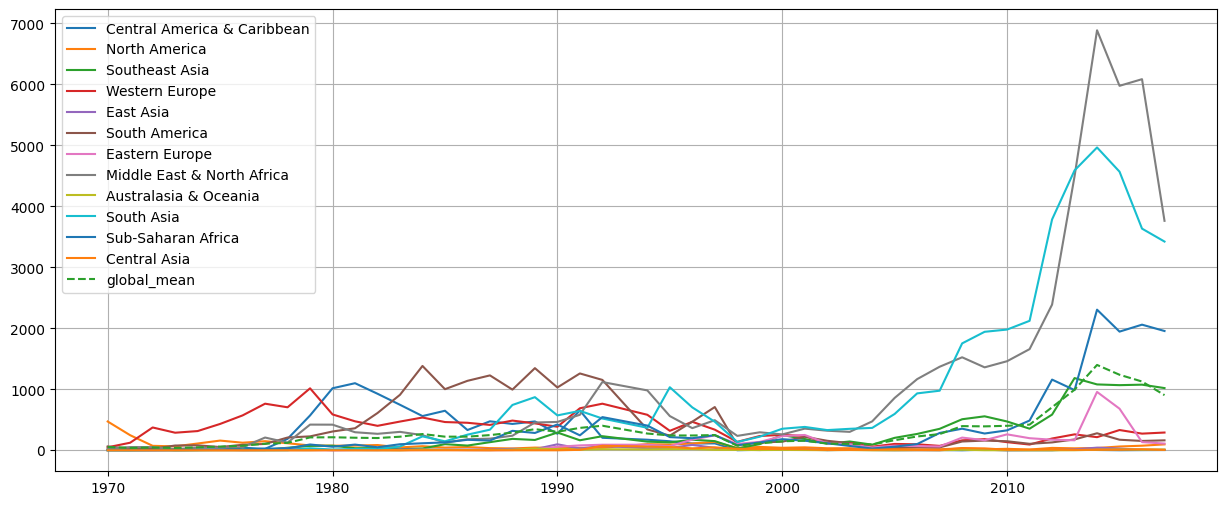

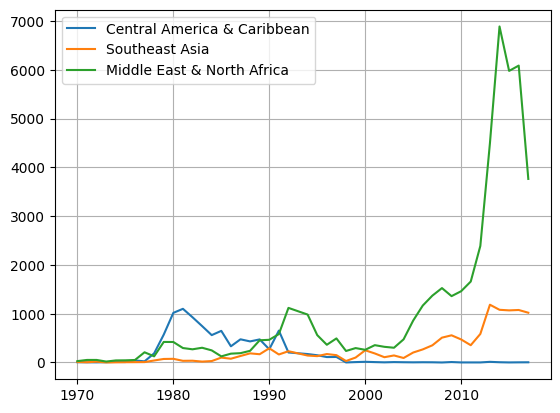

In [15]:
def add_row_mean(df):
    # compute row-wise mean
    glob_mean = df.mean(axis=1)
    # add new column to DataFrame
    df['global_mean'] = glob_mean
add_row_mean(df4)
df4.sort_index().tail(15)

df4 = df4.sort_index()
df4.plot(figsize=(15, 6), grid=True, style=['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--'])
plt.show()

df4[['Central America & Caribbean', 'Southeast Asia', 'Middle East & North Africa']].plot(grid=True)
plt.show()

df4.index.name = 'year'
df_race = df4.apply(pd.to_numeric, errors='coerce', axis=1)

In [16]:
cumulative_attacks_df = df_race.cumsum()

bcr.bar_chart_race(df=cumulative_attacks_df, filename=None,
                    period_length=1000,
                    title="Cumulative count of terrorist attacks per region (1970 and 2017)",
                    perpendicular_bar_func='median')

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


**Answer**

 Overall, there has been an increase in the number of attacks in the last 20 years. Before 1997, South Asia, Western Europe and South America had the most attacks. There was never more than 1500 in any of those regions though. Around 2001, South Asia started having more attacks, however the standout regions is by far the Middle East and North Africa. 2014 experienced the most attacks in a single region, and was the most active year for terrorist attacks. Sub-Saharn Africa started climbing above the global average around 2011. It's most active year was also 2014.

# **Question** 2-)
Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

In [28]:

df['incident_count'] = df.groupby('iyear')['iyear'].transform('count')

df['casualties'] = df['nkill'] + df['nwound']

yearly_data = df.groupby('iyear')[['incident_count', 'casualties']].sum().reset_index()

correlation = yearly_data[['incident_count', 'casualties']].corr()
print("Korelasyon Matrisi:")
print(correlation)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=yearly_data['incident_count'], y=yearly_data['casualties'])
plt.title("Incident Count vs. Casualties")
plt.xlabel("Number of Incidents")
plt.ylabel("Number of Casualties")
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(data=yearly_data[['incident_count', 'casualties']])
plt.title("Outlier Detection")
plt.show()

Korelasyon Matrisi:
                incident_count  casualties
incident_count        1.000000    0.899732
casualties            0.899732    1.000000


When we look at general corelation between casualties and incident count its clear that there is a strong correlation between two but we see that in our graph increase in incidents isn't always cause increase in casualties

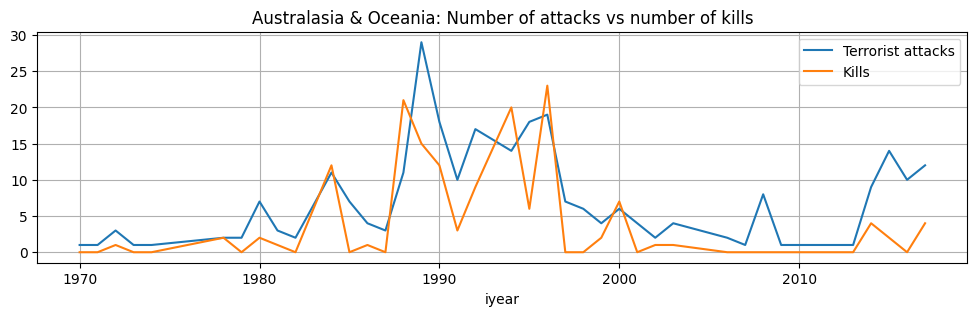

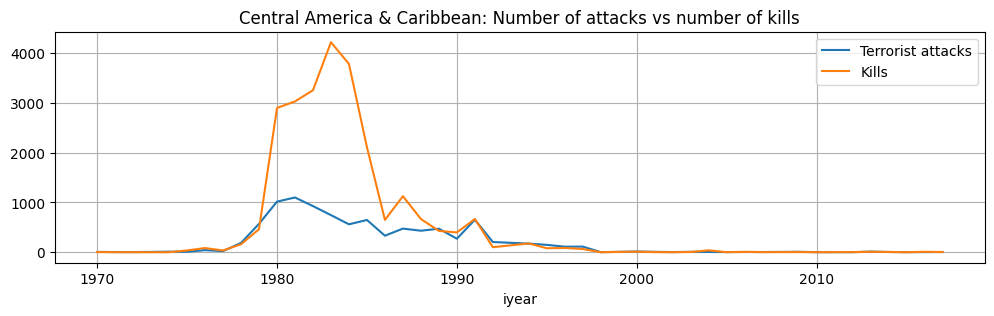

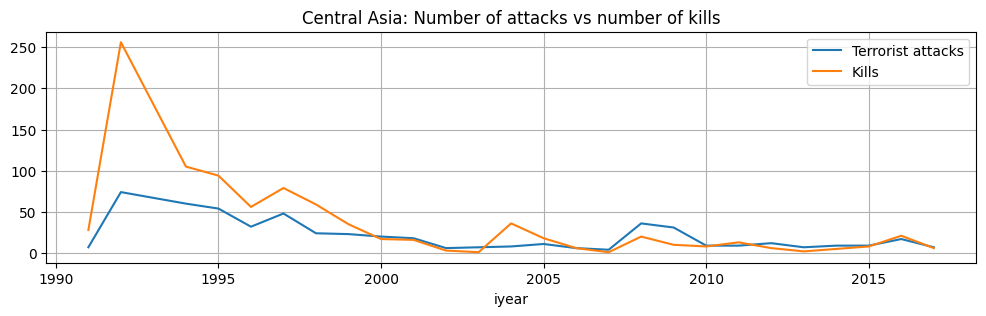

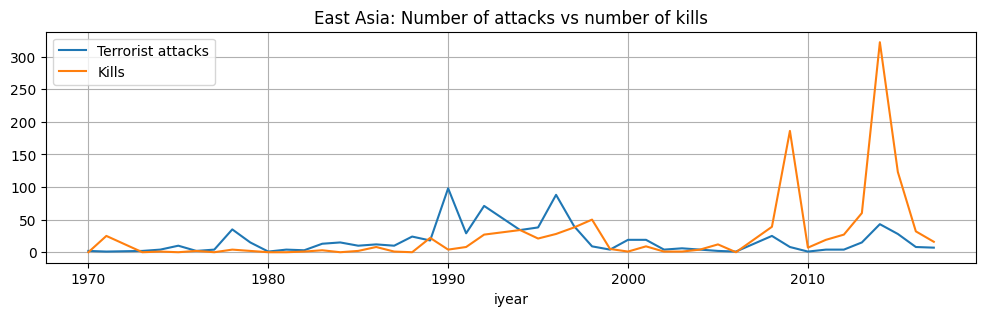

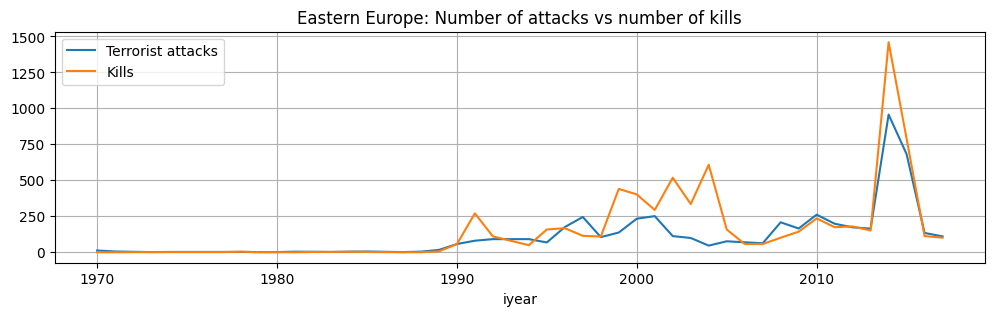

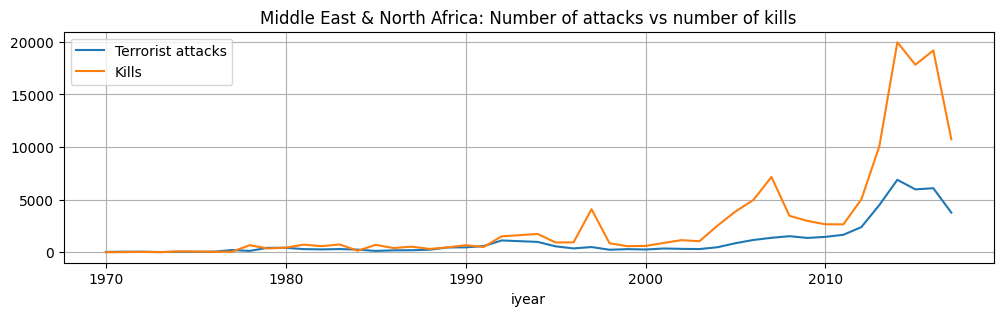

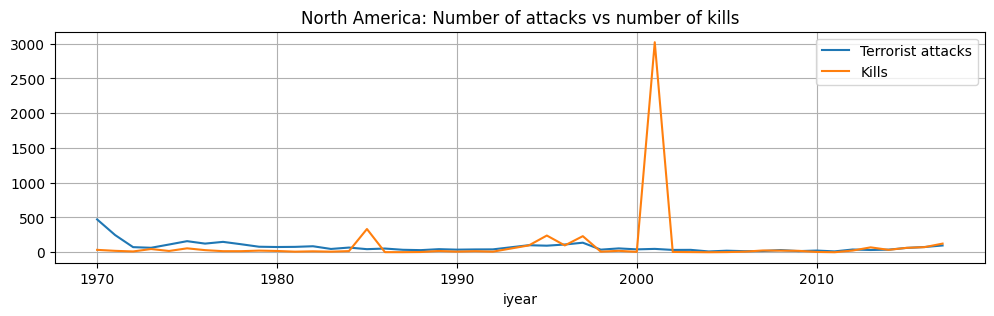

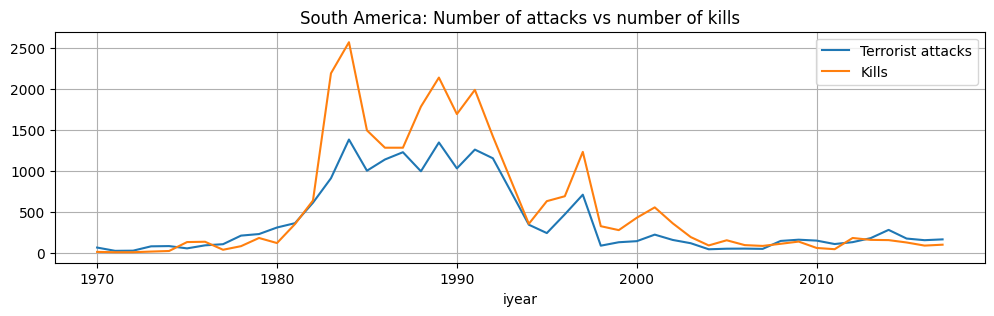

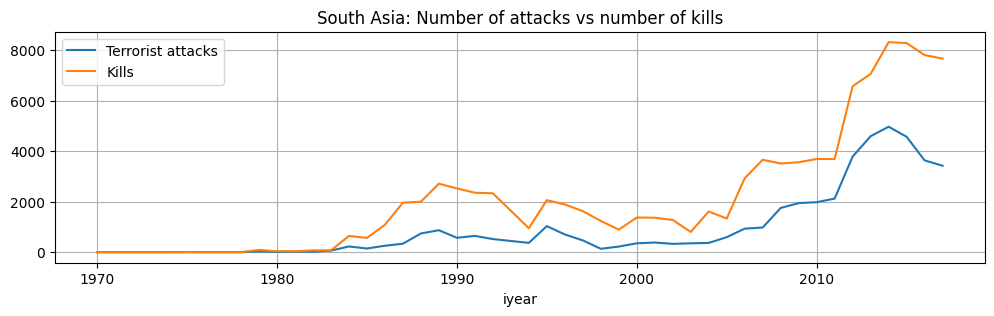

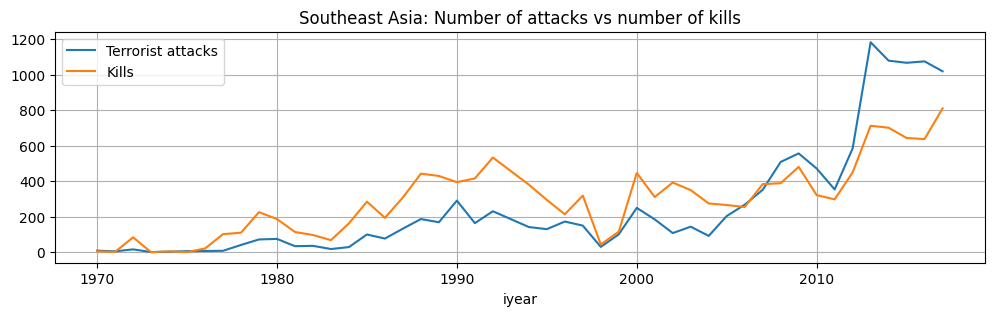

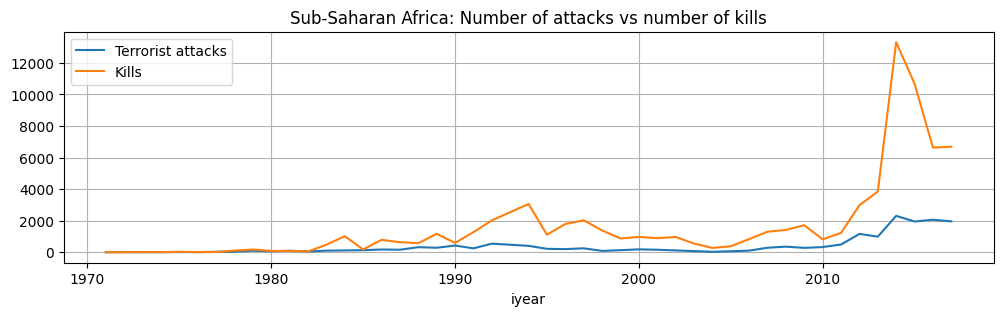

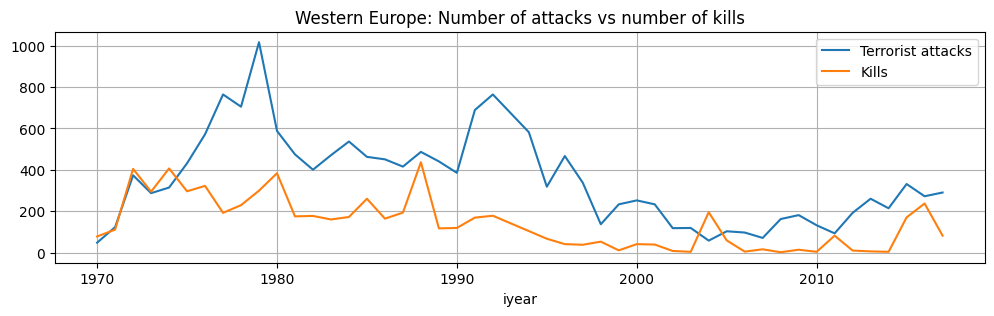

In [23]:
for region in df3.index.levels[0]:
    df3.loc[region, :].plot(grid=True, figsize=(12, 3))
    plt.title(f"{region}: Number of attacks vs number of kills")
    plt.legend(['Terrorist attacks', 'Kills'])

We can see this change clear in regions

In [24]:
correlation_df = pd.DataFrame(index=df3.index.levels[0], columns=['Correlation'])

for region in df3.index.levels[0]:
    correlation_df.loc[region]['Correlation'] = df3.loc[region, :]['eventid'].corr(df3.loc[region, :]['nkill'])

correlation_df.sort_values(['Correlation'], ascending=False)

<ipython-input-24-35d21bf9e37f>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  correlation_df.loc[region]['Correlation'] = df3.loc[region, :]['eventid'].corr(df3.loc[region, :]['nkill'])


,Correlation
region_txt,
Middle East & North Africa,0.974635
South Asia,0.968395
South America,0.945654
Sub-Saharan Africa,0.9389
Eastern Europe,0.869378
Central Asia,0.866466
Central America & Caribbean,0.86073
Southeast Asia,0.850494
Australasia & Oceania,0.730228


We can use a clear filter for looking for outliers our outlier and extreme outlier treshold would be standart deviaton and its multiplied by 2

In [29]:
std_deviation = correlation_df['Correlation'].std()
median = correlation_df['Correlation'].median()

correlation_df['is_outlier'] = correlation_df['Correlation'] < median - std_deviation
correlation_df['is_extreme_outlier'] = correlation_df['Correlation'] < median - 2*std_deviation

In [30]:
median

0.8635980982004396

In [31]:
correlation_df

,Correlation,is_outlier,is_extreme_outlier
region_txt,,,
Australasia & Oceania,0.730228,False,False
Central America & Caribbean,0.86073,False,False
Central Asia,0.866466,False,False
East Asia,0.200658,True,True
Eastern Europe,0.869378,False,False
Middle East & North Africa,0.974635,False,False
North America,-0.029532,True,True
South America,0.945654,False,False
South Asia,0.968395,False,False


**Answer 2:** The correlation_df median is 0.83 This means that there is very high correlation between the number of terrorist attacks in a region, and the number of confirmed deaths due to the attacks. Outliers are East Asia and North America, with North America being the only extreme outlier. It actually has a negative, albeit neglegible correlation between its attack number and number of kills.

# Question 3
What are the most common methods of attacks? Does it differ in various regions or in time?

attacktype1_txt
Bombing/Explosion                      86843
Armed Assault                          41107
Assassination                          18819
Hostage Taking (Kidnapping)            10671
Facility/Infrastructure Attack         10186
Unknown                                 6931
Unarmed Assault                          986
Hostage Taking (Barricade Incident)      962
Hijacking                                629
Name: count, dtype: int64


<ipython-input-57-465f3d643ce9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attacks.index, y=top_attacks.values, palette="viridis")


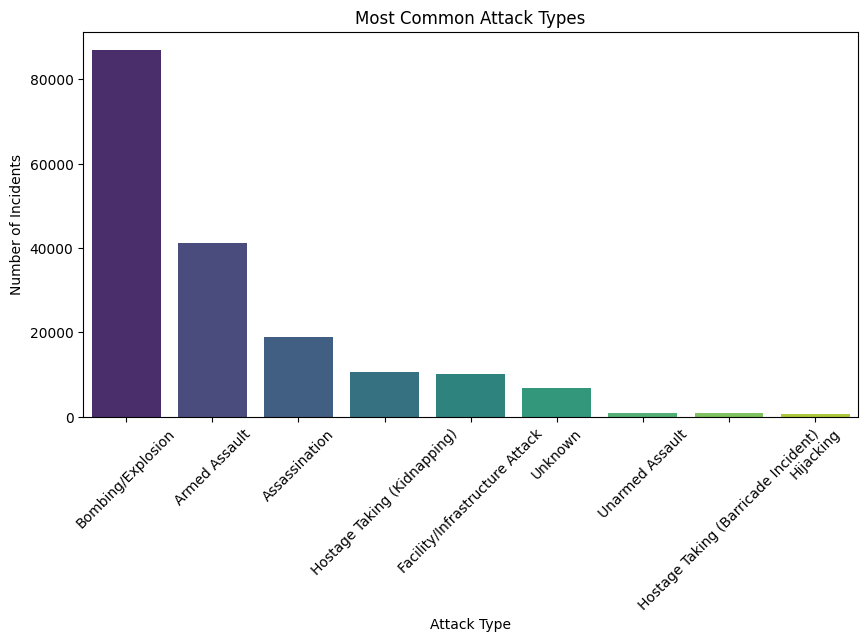

<Figure size 600x400 with 0 Axes>

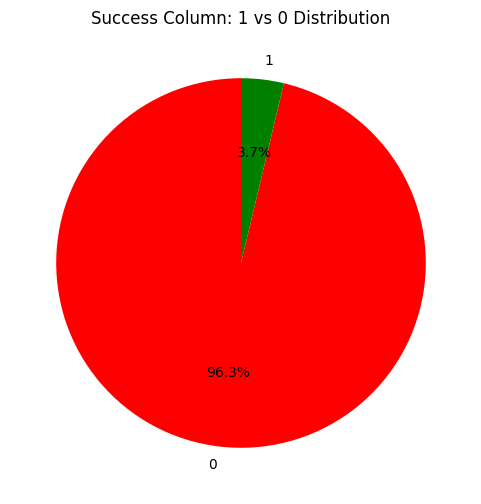

In [57]:
top_attacks = df['attacktype1_txt'].value_counts()
print(top_attacks)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_attacks.index, y=top_attacks.values, palette="viridis")
plt.title("Most Common Attack Types")
plt.xticks(rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Number of Incidents")
plt.show()


suicide_counts=df['suicide'].value_counts()

plt.figure(figsize=(6,4))

plt.figure(figsize=(6,6))
suicide_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title("Success Column: 1 vs 0 Distribution")
plt.ylabel("")
plt.show()

# Grafiği göster
plt.show()

In general world we see that Bombing/Explosions are the most common way

We can also see that only %3.7 of attacks are Suicide attacks

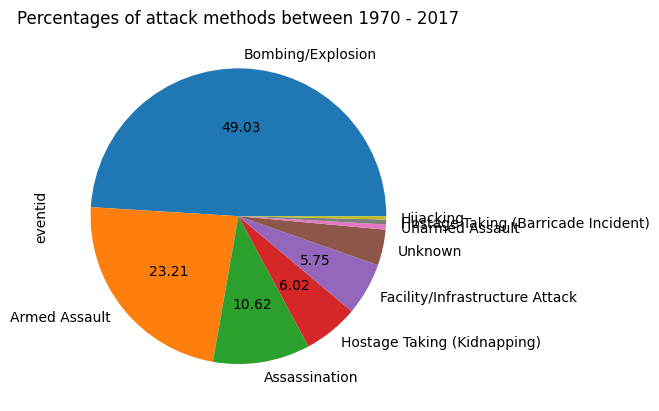

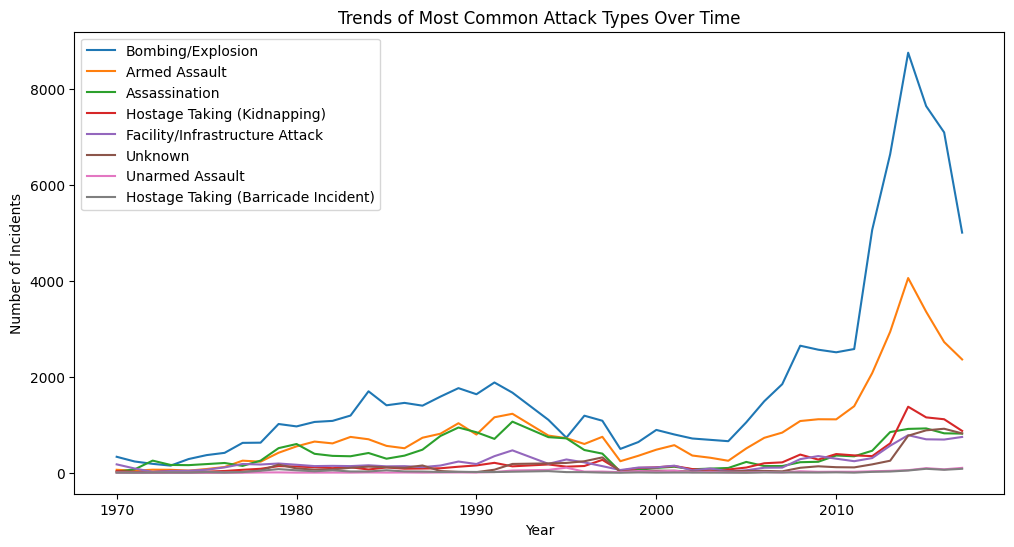

In [70]:
attack_type_count_df = df[['iyear', 'attacktype1_txt', 'eventid']].groupby(['iyear', 'attacktype1_txt']).count().sort_values(['iyear', 'eventid'], ascending=[True, False])
attack_type_count_df.head(20)

df[['attacktype1_txt', 'eventid']].groupby(['attacktype1_txt']).count().sort_values(['eventid'], ascending=False).plot.pie(subplots=True,
  autopct=lambda p: format(p, '.2f') if p > 4 else None)
plt.legend().remove()
plt.title("Percentages of attack methods between 1970 - 2017")
plt.show()


attack_trends = df.groupby(['iyear', 'attacktype1_txt']).size().unstack().fillna(0)


plt.figure(figsize=(12, 6))
top_3_attacks = top_attacks.index[:8]
for attack in top_3_attacks:
    plt.plot(attack_trends.index, attack_trends[attack], label=attack)

plt.title("Trends of Most Common Attack Types Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()



In [71]:
attack_type_count_df.index.levels[0]
overtime = pd.DataFrame(index=list(attack_type_count_df.index.levels[0]),
                                   columns=[['Top Attack Type', 'Amount']])
for i in list(attack_type_count_df.index.levels[0]):
    # populate Amount column with top value for each year
    overtime.loc[i]['Amount'] = attack_type_count_df.loc[i].max()['eventid']

    # populate top type of attack for each year
    overtime.loc[i]['Top Attack Type'] = attack_type_count_df.loc[i].iloc[0].name

overtime.head(47)


<ipython-input-71-43465f94f170>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  overtime.loc[i]['Amount'] = attack_type_count_df.loc[i].max()['eventid']
<ipython-input-71-43465f94f170>:9: FutureWarning: ChainedAssignmentError: behaviour wil

,Top Attack Type,Amount
1970,Bombing/Explosion,332
1971,Bombing/Explosion,234
1972,Assassination,252
1973,Assassination,162
1974,Bombing/Explosion,285
1975,Bombing/Explosion,367
1976,Bombing/Explosion,414
1977,Bombing/Explosion,622
1978,Bombing/Explosion,626
1979,Bombing/Explosion,1015


We can see that almost each year Bombing/Explosion is the most used method

The irregular years like 1972/73 are caused by the the world scape at that things like cold war and such

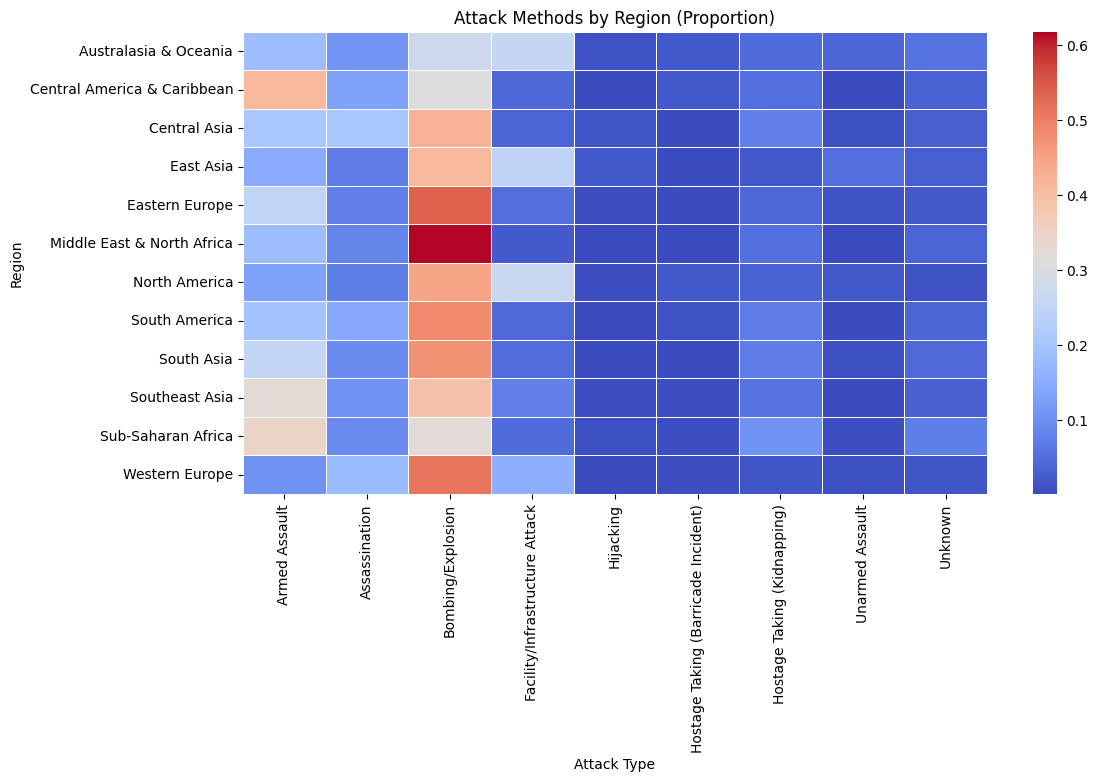

In [72]:
attack_by_region = df.groupby('region_txt')['attacktype1_txt'].value_counts(normalize=True).unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(attack_by_region, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Attack Methods by Region (Proportion)")
plt.xlabel("Attack Type")
plt.ylabel("Region")
plt.show()

With this heatmap there could be resulutions like In Central America the most common way is armed assault but lets make it clear

In [74]:
attack_type_count_regions = df[['region_txt', 'attacktype1_txt', 'eventid']].groupby(['region_txt', 'attacktype1_txt']).count().sort_values(['region_txt', 'eventid'], ascending=[True, False])
attack_type_count_regions.head(100)

eventid
region_txt            attacktype1_txt                             
Australasia & Oceania Bombing/Explosion                         75
                      Facility/Infrastructure Attack            71
                      Armed Assault                             51
                      Assassination                             30
                      Unknown                                   16
...                                                            ...
Sub-Saharan Africa    Facility/Infrastructure Attack           786
                      Hijacking                                129
                      Hostage Taking (Barricade Incident)       92
                      Unarmed Assault                           79
Western Europe        Bombing/Explosion                       8437

[100 rows x 1 columns]

**Answer**

The most common methods of attack are overwhelmingly Bombings and Exposions. Almost 50% of all terrorist attacks in between 1970 - 2017. 45 out of the 47 years in the study(96%) have bombings as the most common attack type, and the 2 years where the attack types aren't bombings also have the least amount of top attacks of all the years. Regarding terms of regions, 5/6 regions have bombings as their most common attack type. Central America & The Caribbean have Armed Assault as its most common type, with bombings coming in second.

# Question 4
Plot the locations of attacks on a map to visualize their regional spread

In [75]:
locations_df = df[['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'weaptype1_txt']]
fig = px.scatter_geo(df.head(50),lat='latitude',lon='longitude', symbol='region_txt',
                     hover_name="country_txt",
                     hover_data=['weaptype1_txt', 'region_txt'])
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()